In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
df.head()

,Marital status,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,5,171,1,Basic Education,122.0,Incomplete Basic Education,Incomplete Basic Education,Service industry,Manual work,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,1,9254,1,Basic Education,160.0,Basic Education,Higher Education,Manual work,Manual work,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,5,9070,1,Basic Education,122.0,Incomplete Basic Education,Incomplete Basic Education,Manual work,Manual work,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,2,9773,1,Basic Education,122.0,Incomplete Basic Education,Incomplete Basic Education,Service industry,Manual work,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,1,8014,0,Basic Education,100.0,Incomplete Basic Education,Incomplete Basic Education,Manual work,Manual work,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [19]:
cat_columns = ['Previous qualification', 
               "Mother's qualification", 
               "Father's qualification", 
               "Mother's occupation", 
               "Father's occupation", 
               "Marital status", 
               "Course"]
num_columns = ['Application order', 
               "Previous qualification (grade)", 
               "Admission grade", 
               "Curricular units 1st sem (credited)", 
               "Curricular units 1st sem (enrolled)", 
               "Curricular units 1st sem (evaluations)", 
               "Curricular units 1st sem (approved)", 
               "Curricular units 1st sem (grade)", 
               "Curricular units 1st sem (without evaluations)", 
               "Curricular units 2nd sem (credited)", 
               "Curricular units 2nd sem (enrolled)", 
               "Curricular units 2nd sem (evaluations)", 
               "Curricular units 2nd sem (approved)", 
               "Curricular units 2nd sem (grade)", 
               "Curricular units 2nd sem (without evaluations)", 
               "Unemployment rate", 
               "Inflation rate", 
               "GDP"]

In [3]:
# bool_like_cols = ['Daytime/evening attendance\t', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

# for col in bool_like_cols: 
#     df[col] = df[col].map({1:True, 0:False})

In [4]:
df.head()

,Marital status,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,5,171,1,Basic Education,122.0,Incomplete Basic Education,Incomplete Basic Education,Service industry,Manual work,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,1,9254,1,Basic Education,160.0,Basic Education,Higher Education,Manual work,Manual work,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,5,9070,1,Basic Education,122.0,Incomplete Basic Education,Incomplete Basic Education,Manual work,Manual work,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,2,9773,1,Basic Education,122.0,Incomplete Basic Education,Incomplete Basic Education,Service industry,Manual work,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,1,8014,0,Basic Education,100.0,Incomplete Basic Education,Incomplete Basic Education,Manual work,Manual work,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
columns = df.columns
columns[30]

'Curricular units 2nd sem (without evaluations)'

In [6]:
df["Father's occupation"].value_counts()

Father's occupation
Manual work         2672
Office Workers       735
Service industry     532
Military             273
Student              128
Other                 84
Name: count, dtype: int64

In [ ]:
df = pd.read_csv("../Data/data.csv", sep=';')
X = df.drop("Target", axis=1)
# Specify which columns to one-hot encode
cols_to_encode = [
    'Previous qualification',
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Course', 
    'Marital status'
]
 
# Create a column transformer that applies OneHotEncoder to specified columns
# and passes through the rest unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode)
    ],
    remainder='passthrough'
)
 
preprocessor.fit(X)
X = preprocessor.transform(X)
X = pd.DataFrame(X.toarray(), columns=preprocessor.get_feature_names_out())
print(X.head())

In [ ]:
x = df.drop('Target', axis=1)
y = df['Target']

# scaler = RobustScaler()
# x = scaler.fit_transform(x)
encoder = OneHotEncoder(handle_unknown="ignore")
# Assume for simplicity all features are categorical.
encoder.fit(x) 
x = encoder.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



In [8]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(x_train, y_train)

In [9]:
# clf.predict(x_test)

In [10]:
target_names = [str(c) for c in clf.classes_]
print(target_names)

['Dropout', 'Enrolled', 'Graduate']


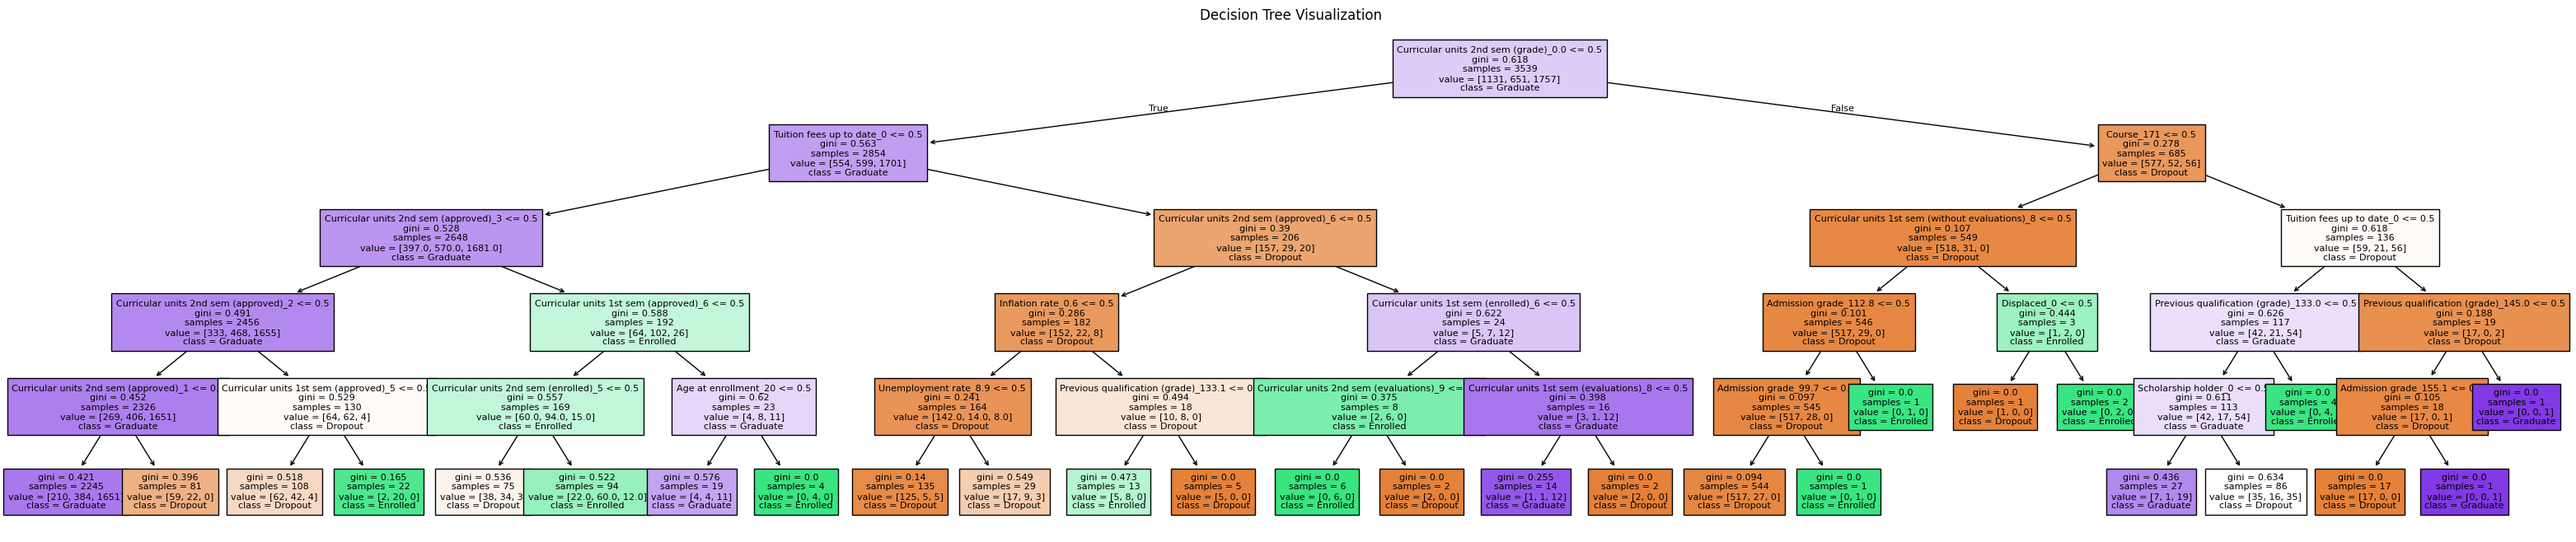

In [11]:
plt.figure(figsize=(40, 8))
tree.plot_tree(clf, filled=True, feature_names=encoder.get_feature_names_out(), class_names=target_names, fontsize=8)
plt.title('Decision Tree Visualization')
plt.savefig('../Figures/tree_vis.png', dpi=400, bbox_inches='tight')
plt.show()

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(clf.predict(x_test), y_test)

0.7446327683615819

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.05400
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

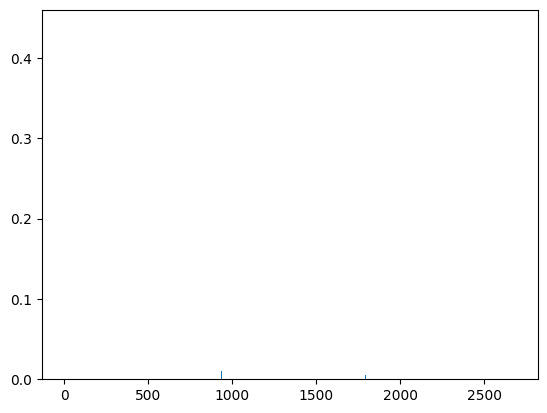

In [14]:
import matplotlib.pyplot as plt
# Get importance
importance = clf.feature_importances_

# Summarize feature importance
for i, v in enumerate(importance):
    print(f'Feature: {i}, Score: {v:.5f}')
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [15]:
accuracies = []
max_acc = 0
for i in range(1,40):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(x_train, y_train)
    acc = accuracy_score(clf.predict(x_test), y_test)
    accuracies.append(acc)
    print(f'Depht = {i} and accuracy = {acc}')
    if acc > max_acc:
        max_acc = acc
        depth = i 

print(f'Best acc = {max_acc} with depth = {depth}')

Depht = 1 and accuracy = 0.6587570621468927
Depht = 2 and accuracy = 0.7005649717514124
Depht = 3 and accuracy = 0.7141242937853107
Depht = 4 and accuracy = 0.7299435028248588
Depht = 5 and accuracy = 0.7446327683615819
Depht = 6 and accuracy = 0.7457627118644068
Depht = 7 and accuracy = 0.7435028248587571
Depht = 8 and accuracy = 0.7446327683615819
Depht = 9 and accuracy = 0.7446327683615819
Depht = 10 and accuracy = 0.7502824858757062
Depht = 11 and accuracy = 0.7468926553672316
Depht = 12 and accuracy = 0.7491525423728813
Depht = 13 and accuracy = 0.7389830508474576
Depht = 14 and accuracy = 0.7310734463276836
Depht = 15 and accuracy = 0.7299435028248588
Depht = 16 and accuracy = 0.7322033898305085
Depht = 17 and accuracy = 0.7175141242937854
Depht = 18 and accuracy = 0.7073446327683616
Depht = 19 and accuracy = 0.7107344632768362
Depht = 20 and accuracy = 0.7209039548022599
Depht = 21 and accuracy = 0.7220338983050848
Depht = 22 and accuracy = 0.7197740112994351
Depht = 23 and accu